In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import funciones as f
import seaborn as sns

In [359]:
df_enusc = pd.read_csv("base-usuario-20-enusc-2023.csv")

In [360]:
print(df_enusc.dtypes)

rph_ID                    object
idhogar                   object
enc_idr                    int64
enc_region                 int64
enc_rpc                    int64
                          ...   
Fact_Hog_Com             float64
Fact_Hog_Reg             float64
Fact_Hog_Regional_102    float64
VarStrat                 float64
Conglomerado             float64
Length: 1301, dtype: object


In [361]:
def bar_plot(data, labels, title, xlabel, ylabel, color='skyblue', width=0.4):
    """
    Crea un grafico de barras.

    Args:
        data: Lista o array con los valores de las barras.
        labels: Lista o array con las etiquetas de las barras.
        title: Titulo del gráfico.
        xlabel: Etiqueta del eje x.
        ylabel: Etiqueta del eje y.
        color: Color de las barras (opcional, predeterminado 'skyblue').
        width: Ancho de las barras (opcional, predeterminado 0.4).
    """

    # Validar que labels y data tengan la misma longitud
    if len(labels) != len(data):
        raise ValueError("La longitud de 'labels' debe ser igual a la longitud de 'data'.")

    plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
    plt.bar(range(len(data)), data, color=color, width=width)

    # Agregar título y etiquetas de los ejes
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Configurar las etiquetas del eje x
    plt.xticks(range(len(data)), labels, rotation=45)

    # Agregar valores sobre las barras
    for i, v in enumerate(data):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

## Percepcion de Aumento inseguridad

### Percepcion de Aumento inseguridad nivel `Pais`

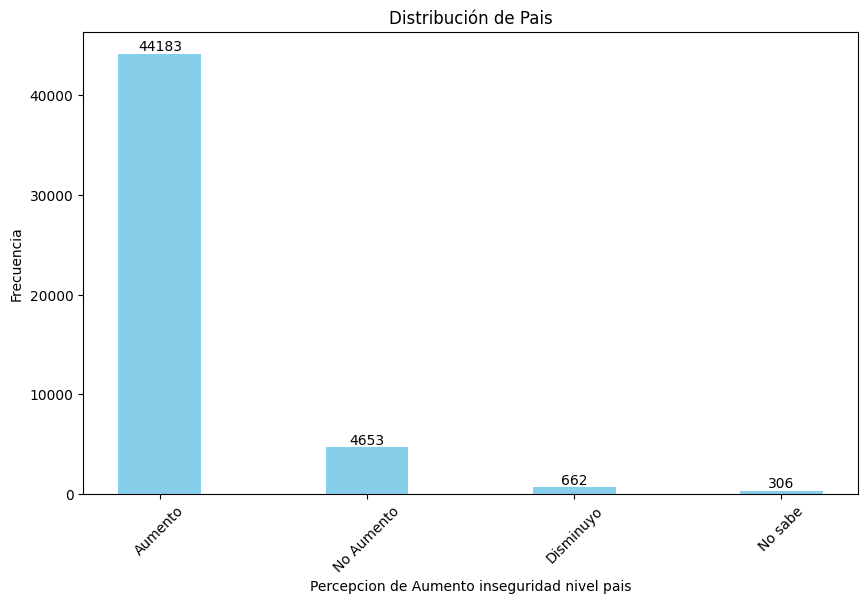

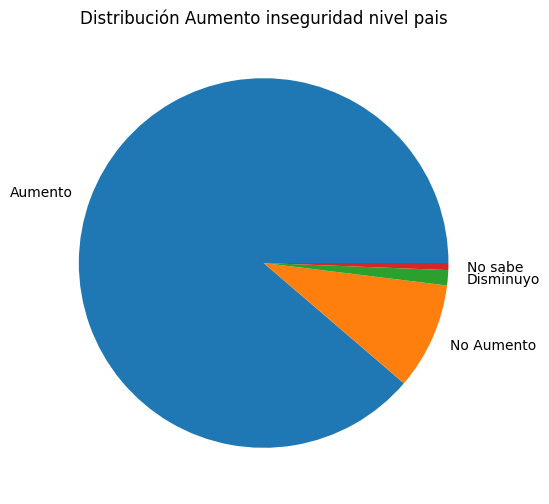

In [362]:
df_pais = df_enusc["P_AUMENTO_PAIS"].fillna(99)

pais_cout = df_pais.value_counts().sort_index()

# Graficos excluye "No responde"
etiquetas = ['Aumento', 'No Aumento', 'Disminuyo', 'No sabe', 'No responde']
title = 'Distribución de Pais'
xlabel = 'Percepcion de Aumento inseguridad nivel pais'
ylabel = 'Frecuencia'
bar_plot(pais_cout.values[:4], etiquetas[:4], title, xlabel, ylabel)

plt.figure(figsize=(10, 6))
plt.pie(pais_cout.values[:4], labels=etiquetas[:4])
plt.title('Distribución Aumento inseguridad nivel pais')
plt.show()

### Percepcion de Aumento inseguridad nivel region: `BioBio`

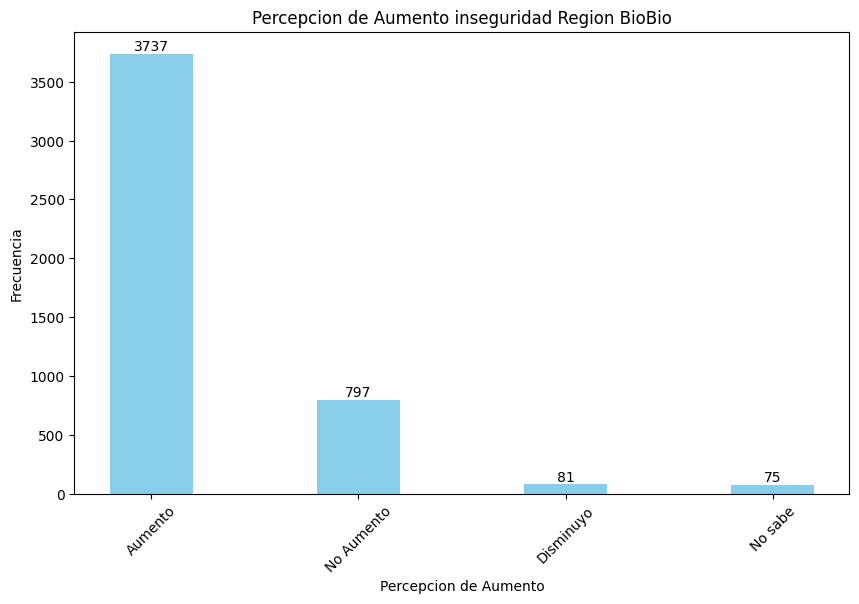

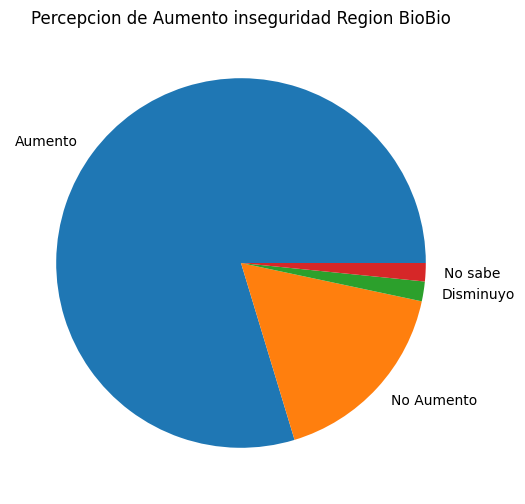

In [363]:
# Seleccion de region BioBio y limpieza de datos 
region_nombre = df_enusc.loc[df_enusc["enc_region"] == 8, "P_AUMENTO_COM"]
region_nombre.fillna(99, inplace=True)
region_count = region_nombre.value_counts().sort_index()


# Graficos excluye "No responde"
etiquetas = ["Aumento", "No Aumento", "Disminuyo", "No sabe", "No responde"]
titulo = 'Percepcion de Aumento inseguridad Region BioBio'
etiqueta_x = 'Percepcion de Aumento'
etiqueta_y = 'Frecuencia'
bar_plot(region_count.values[:4], etiquetas[:4], titulo, etiqueta_x, etiqueta_y)

plt.figure(figsize=(10, 6))
plt.pie(region_count.values[:4], labels=etiquetas[:4])
plt.title('Percepcion de Aumento inseguridad Region BioBio')
plt.show()



### Percepcion de Aumento inseguridad nivel comuna: `Concepcion`

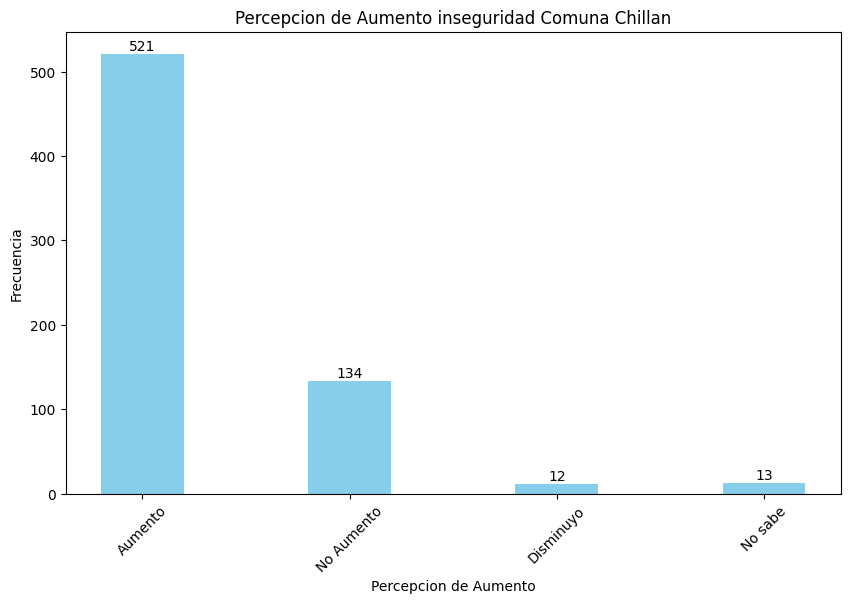

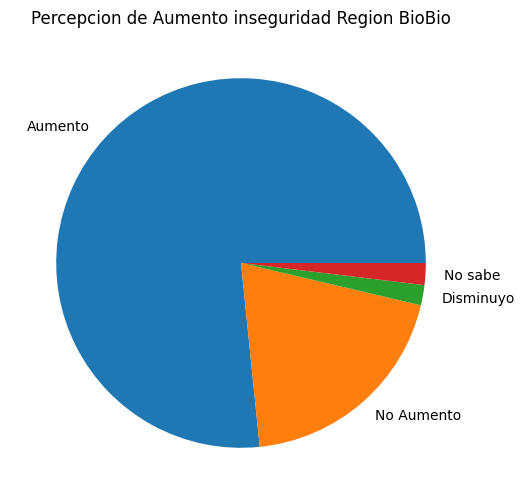

In [364]:
# 
comuna_nombre = df_enusc.loc[df_enusc["enc_rpc"] == 8101, "P_AUMENTO_COM"]
comuna_nombre.fillna(99, inplace=True)
comuna_count = comuna_nombre.value_counts().sort_index()

# Graficos excluye "No responde"
etiquetas = ["Aumento", "No Aumento", "Disminuyo", "No sabe", "No responde"]
titulo = 'Percepcion de Aumento inseguridad Comuna Chillan'
etiqueta_x = 'Percepcion de Aumento'
etiqueta_y = 'Frecuencia'
bar_plot(comuna_count.values[:4], etiquetas[:4], titulo, etiqueta_x, etiqueta_y)

plt.figure(figsize=(10, 6))
plt.pie(comuna_count.values[:4], labels=etiquetas[:4])
plt.title('Percepcion de Aumento inseguridad Region BioBio')
plt.show()



### Percepcion aumento de inseguridad con edad

             rph_edad P_INSEG_DIA_1
0        50 a 59 años      Seguro/a
5        40 a 49 años      Seguro/a
8        60 a 69 años      Seguro/a
10      70 años o más      Seguro/a
12       60 a 69 años      Seguro/a
...               ...           ...
146280   60 a 69 años      Seguro/a
146283   20 a 29 años    Inseguro/a
146285   20 a 29 años      Seguro/a
146290   20 a 29 años      Seguro/a
146291   50 a 59 años    Inseguro/a

[48826 rows x 2 columns]


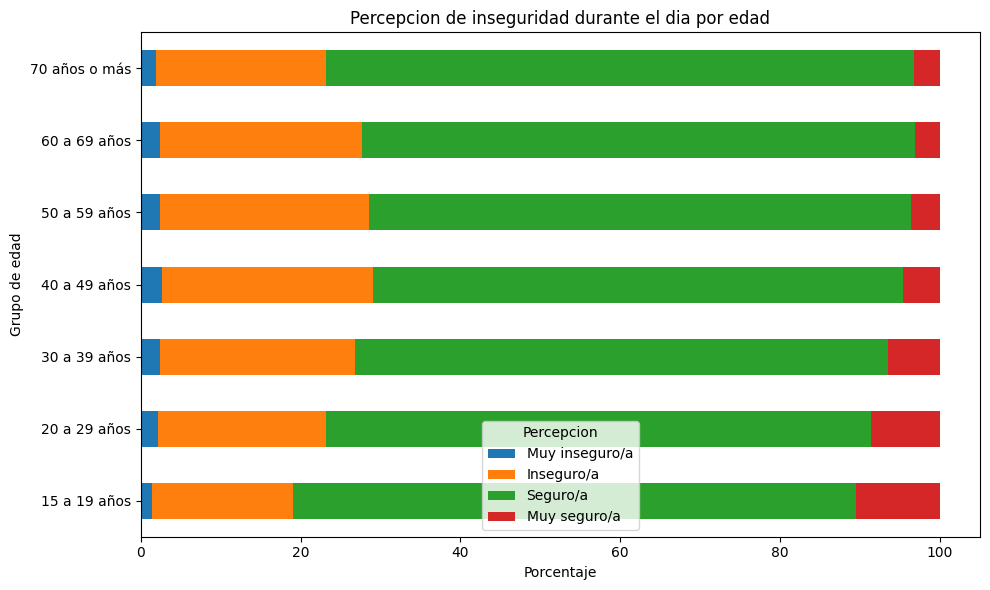

In [365]:
df_pais = df_enusc[["rph_edad", "P_INSEG_DIA_1"]].copy()
# Eliminar filas con valores no deseados
df_pais = df_pais[df_pais["P_INSEG_DIA_1"].isin([1, 2, 3, 4])]

# Renombrar los valores de la columna "rph_edad" con su etiqueta correspondiente
labels = {
    0: "0 a 14 años",
    1: "15 a 19 años",
    2: "20 a 29 años",
    3: "30 a 39 años",
    4: "40 a 49 años",
    5: "50 a 59 años",
    6: "60 a 69 años",
    7: "70 años o más"
}
df_pais["rph_edad"] = df_pais["rph_edad"].replace(labels)

# Renombrar los valores de la columna "P_INSEG_DIA_1" con su etiqueta correspondiente
inseg_labels = {
    1: "Muy inseguro/a",
    2: "Inseguro/a",
    3: "Seguro/a",
    4: "Muy seguro/a"
}
df_pais["P_INSEG_DIA_1"] = df_pais["P_INSEG_DIA_1"].replace(inseg_labels)

print(df_pais)


# Crear tabla de frecuencias cruzadas normalizada por filas (porcentaje)
tabla = pd.crosstab(df_pais["rph_edad"], df_pais["P_INSEG_DIA_1"], normalize='index') * 100

# Ordenar categorias si es necesario
orden_columnas = ["Muy inseguro/a", "Inseguro/a", "Seguro/a", "Muy seguro/a"]
tabla = tabla[orden_columnas]

# Grafico de barras apiladas horizontales
tabla.plot(kind='barh', stacked=True, figsize=(10, 6))

plt.xlabel("Porcentaje")
plt.ylabel("Grupo de edad")
plt.title("Percepcion de inseguridad durante el dia por edad")
plt.legend(title="Percepcion")
plt.tight_layout()
plt.show()


## Categoria: Hackeo de correo o redes sociales (HACK)

### Cantidad de delitos a nivel pais

HACK
0.0    47981
1.0     1832
Name: count, dtype: int64


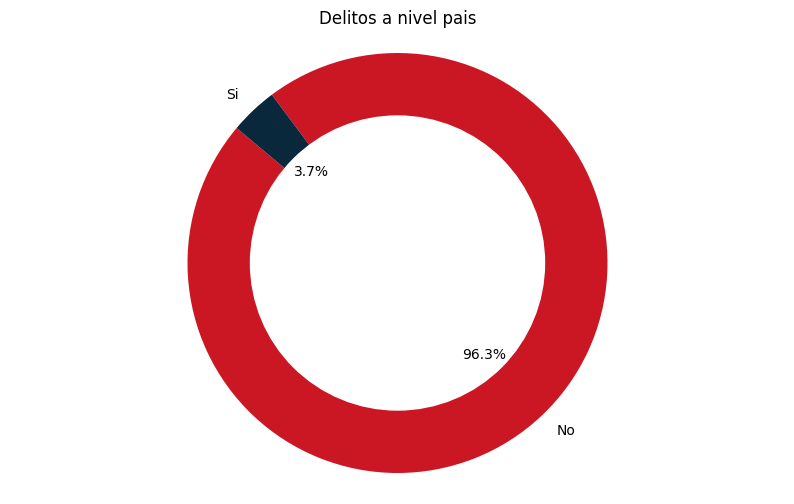

In [366]:
# Cantidad de delitos a nivel pais
# Usamos variable HACK que filtra si el delito fue cometido o no
total_hack_pais = df_enusc["HACK"].value_counts().sort_index()
print(total_hack_pais)

labels = ["No", "Si"]
title = 'Delitos a nivel pais' 

# crear grafico de torta
plt.figure(figsize=(10, 6))
plt.pie(total_hack_pais.values, labels=labels, autopct='%1.1f%%', colors={"#09283CFF", "#CB1724FF"}, startangle=140)
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('equal')
plt.title(title)
plt.show()

### Creacion DataFrame HACK



In [367]:
# Limpieza de datos
# Se eliminan las columnas que no son necesarias para el analisis

# Llamada de angos de columnas a estudiar
hack_columns = df_enusc.columns[df_enusc.columns.get_loc("SCREEN_ROB_HACK"):df_enusc.columns.get_loc("HACK_PERSONAL_N")+1]
hack_descr = df_enusc.columns[df_enusc.columns.get_loc("HACK_QUIEN__0"):df_enusc.columns.get_loc("HACK_MOTIV_NO_DEN")+1]

# Concatenar columnas a estudiar
selected_columns = hack_columns.tolist() + hack_descr.tolist()

# Filtrar el dataframe para obtener solo las filas donde HACK == 1, indicador que que el delito fue cometido
# Agregando las columnas seleccionadas previamente
df_hack = df_enusc.loc[df_enusc["HACK"] == 1, selected_columns]

remove_columns = ["HACK_QUIEN__1", "HACK_QUIEN__2", "HACK_QUIEN__3", "HACK_QUIEN__4", "HACK_QUIEN__5"]
df_hack.drop(columns=remove_columns, inplace=True)

# se hace una limpieza de valores nulos, dependiendo de su descripcion
df_hack.fillna({"HACK_DENUNCIAS_N": 0,
                "HACK_PERSONAL_N": 0,
                "HACK_VALOR_H": 99,
                "HACK_DENUNCIA_COMO": 99,
                "HACK_SATISF_DEN": 99,
                "HACK_ACCION_POLICIAL": 99,
                "HACK_CONTACTO_MP": 99,
                "HACK_CONT_MP_MOT__1": 0,
                "HACK_CONT_MP_MOT__2": 0,
                "HACK_CONT_MP_MOT__3": 0,
                "HACK_CONT_MP_MOT__4": 0,
                "HACK_CONT_MP_MOT__5": 0,
                "HACK_CONT_MP_MOT__88": 0,
                "HACK_CONT_MP_MOT__99": 0,
                "HACK_MOTIV_NO_DEN": 99
                }, inplace=True)


### Identificacion del delito

Basado en la seccion `1.6.1. Identificación de delitos`

SCREEN_ROB_HACK_N
1      1459
2       226
3        83
4        27
5        13
6         4
7         5
8         2
10        7
11        1
15        1
20        2
70        1
100       1
Name: count, dtype: int64


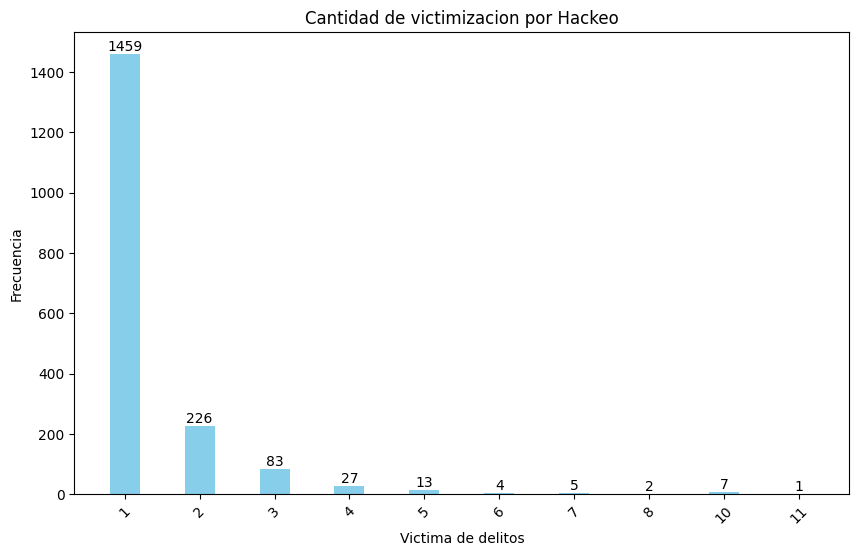

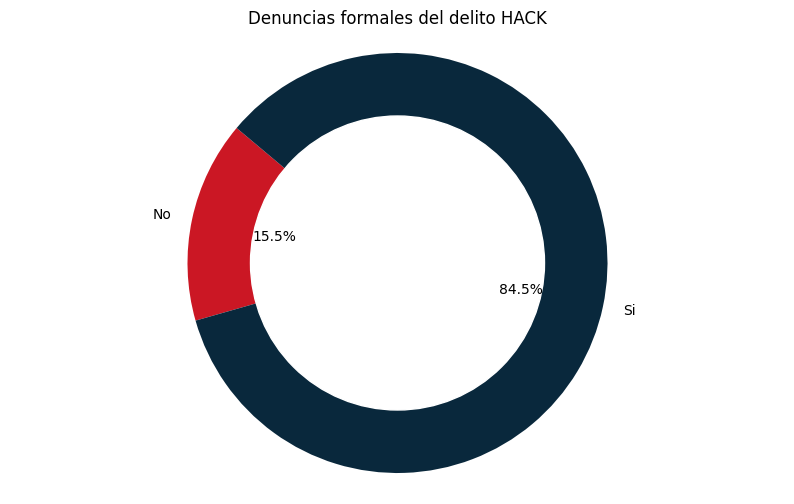

In [368]:
# Frecuencia de victimizacion por hackeo
count_delitos_hack = (df_hack["SCREEN_ROB_HACK_N"].astype(int)).value_counts().sort_index()
print(count_delitos_hack)

titulo = 'Cantidad de victimizacion por Hackeo'
etiqueta_x = 'Victima de delitos'
etiqueta_y = 'Frecuencia'

bar_plot(count_delitos_hack[:10], count_delitos_hack.index[:10], titulo, etiqueta_x, etiqueta_y)

# Porcentaje de denuncias formales del delito
count_denuncias = df_hack["HACK_DENUNCIAS"].value_counts().sort_index()

# Crear grafico de torta
labels = ["No", "Si"]
title = 'Denuncias formales del delito HACK'

plt.figure(figsize=(10, 6))
plt.pie(count_denuncias.values[:2], labels=labels, autopct='%1.1f%%', colors={"#09283CFF", "#CB1724FF"}, startangle=140)
my_circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')
plt.title(title)
plt.show()

### Caracterizacion del delito

Basado en `1.6.2.15. Caracterización: hackeo de correo o redes sociales`

In [369]:
display(df_hack)

,SCREEN_ROB_HACK,SCREEN_ROB_HACK_N,HACK_DENUNCIAS,HACK_DENUNCIAS_N,HACK_PERSONAL,HACK_PERSONAL_N,HACK_QUIEN__0,HACK_MES,HACK_CUENTA,HACK_TIEMPO_RES,...,HACK_ACCION_POLICIAL,HACK_CONTACTO_MP,HACK_CONT_MP_MOT__1,HACK_CONT_MP_MOT__2,HACK_CONT_MP_MOT__3,HACK_CONT_MP_MOT__4,HACK_CONT_MP_MOT__5,HACK_CONT_MP_MOT__88,HACK_CONT_MP_MOT__99,HACK_MOTIV_NO_DEN
380,1.0,1.0,1.0,1.0,1.0,1.0,3.0,14.0,1.0,8.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
408,1.0,3.0,1.0,3.0,1.0,3.0,2.0,10.0,1.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
436,1.0,3.0,2.0,0.0,1.0,3.0,3.0,2.0,1.0,6.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
526,1.0,1.0,2.0,0.0,1.0,1.0,1.0,14.0,1.0,2.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
575,1.0,1.0,2.0,0.0,1.0,1.0,1.0,8.0,1.0,1.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146179,1.0,1.0,1.0,1.0,2.0,0.0,2.0,10.0,1.0,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
146194,1.0,1.0,2.0,0.0,2.0,0.0,4.0,7.0,1.0,5.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
146207,1.0,2.0,2.0,0.0,2.0,0.0,2.0,10.0,1.0,1.0,...,99.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
146280,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,1.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0


In [370]:
# exportar el dataframe a un archivo CSV
df_hack.to_csv("hackeo.csv", index=False)
# exportar df_hack.isna().sum() en un texto
with open("hackeo_isna.txt", "w") as txt:
    txt.write(str(df_hack.isna().sum()))